### Business Case:-Use relevant machine learning model to predict whether the loan will get approved or not.

In [1]:
##importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
## loading the data
data=pd.read_csv('loan_approved.csv')

In [3]:
## Getting the first few rows of data
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
## renaming the target column
data.rename(columns={"Loan_Status (Approved)":'Loan_Status'},inplace=True)

## Basic Checks

In [5]:
data.shape

(614, 13)

In [6]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [8]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
# fetch numerical columns
num_col=data.select_dtypes(include=["int64","float64"]).columns
num_col

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [11]:
# fetch categorical columns
cat_col=data.select_dtypes(include=["object"])
cat_col.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
# find unique categories in categorical columns
for i in cat_col.drop("Loan_ID",axis=1):
    print(i,data[i].unique())
    print(data[i].value_counts())
    print("**********************")

Gender ['Male' 'Female' nan]
Male      489
Female    112
Name: Gender, dtype: int64
**********************
Married ['No' 'Yes' nan]
Yes    398
No     213
Name: Married, dtype: int64
**********************
Dependents ['0' '1' '2' '3+' nan]
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
**********************
Education ['Graduate' 'Not Graduate']
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
**********************
Self_Employed ['No' 'Yes' nan]
No     500
Yes     82
Name: Self_Employed, dtype: int64
**********************
Property_Area ['Urban' 'Rural' 'Semiurban']
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
**********************
Loan_Status ['Y' 'N']
Y    422
N    192
Name: Loan_Status, dtype: int64
**********************


In [13]:
data.describe().T # statistical report for numerical data

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [14]:
data.describe(include='O') # statistical report for categorical data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


## Exploratory Data Analysis

### Univariate analysis

In [15]:
!pip install sweetviz

In [16]:
 #  library for univariant analysis
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html('myreport.html') # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report myreport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Bivariate Analysis

In [103]:
# create dataframe which include categorical data
data1=data[['Gender','Married','Dependents','Education','Self_Employed','Property_Area']]
# Create dataframe which includes numerical data
data2=data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]

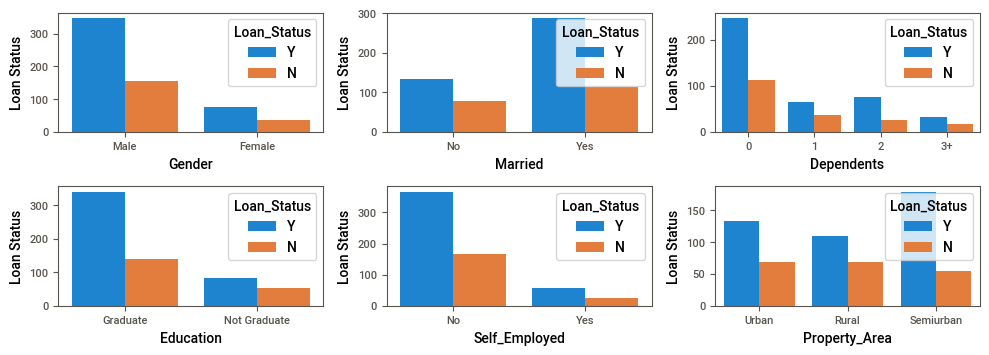

In [104]:
# count plot 
plt.figure(figsize=(10,5), facecolor='white') # canva size
plotnumber = 1 # count of graph

for column in data1: # data1 is categorical data
    if plotnumber<=6 :
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(x=data1[column],hue=data['Loan_Status'])
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Loan Status',fontsize=10)
    plotnumber+=1
plt.tight_layout()

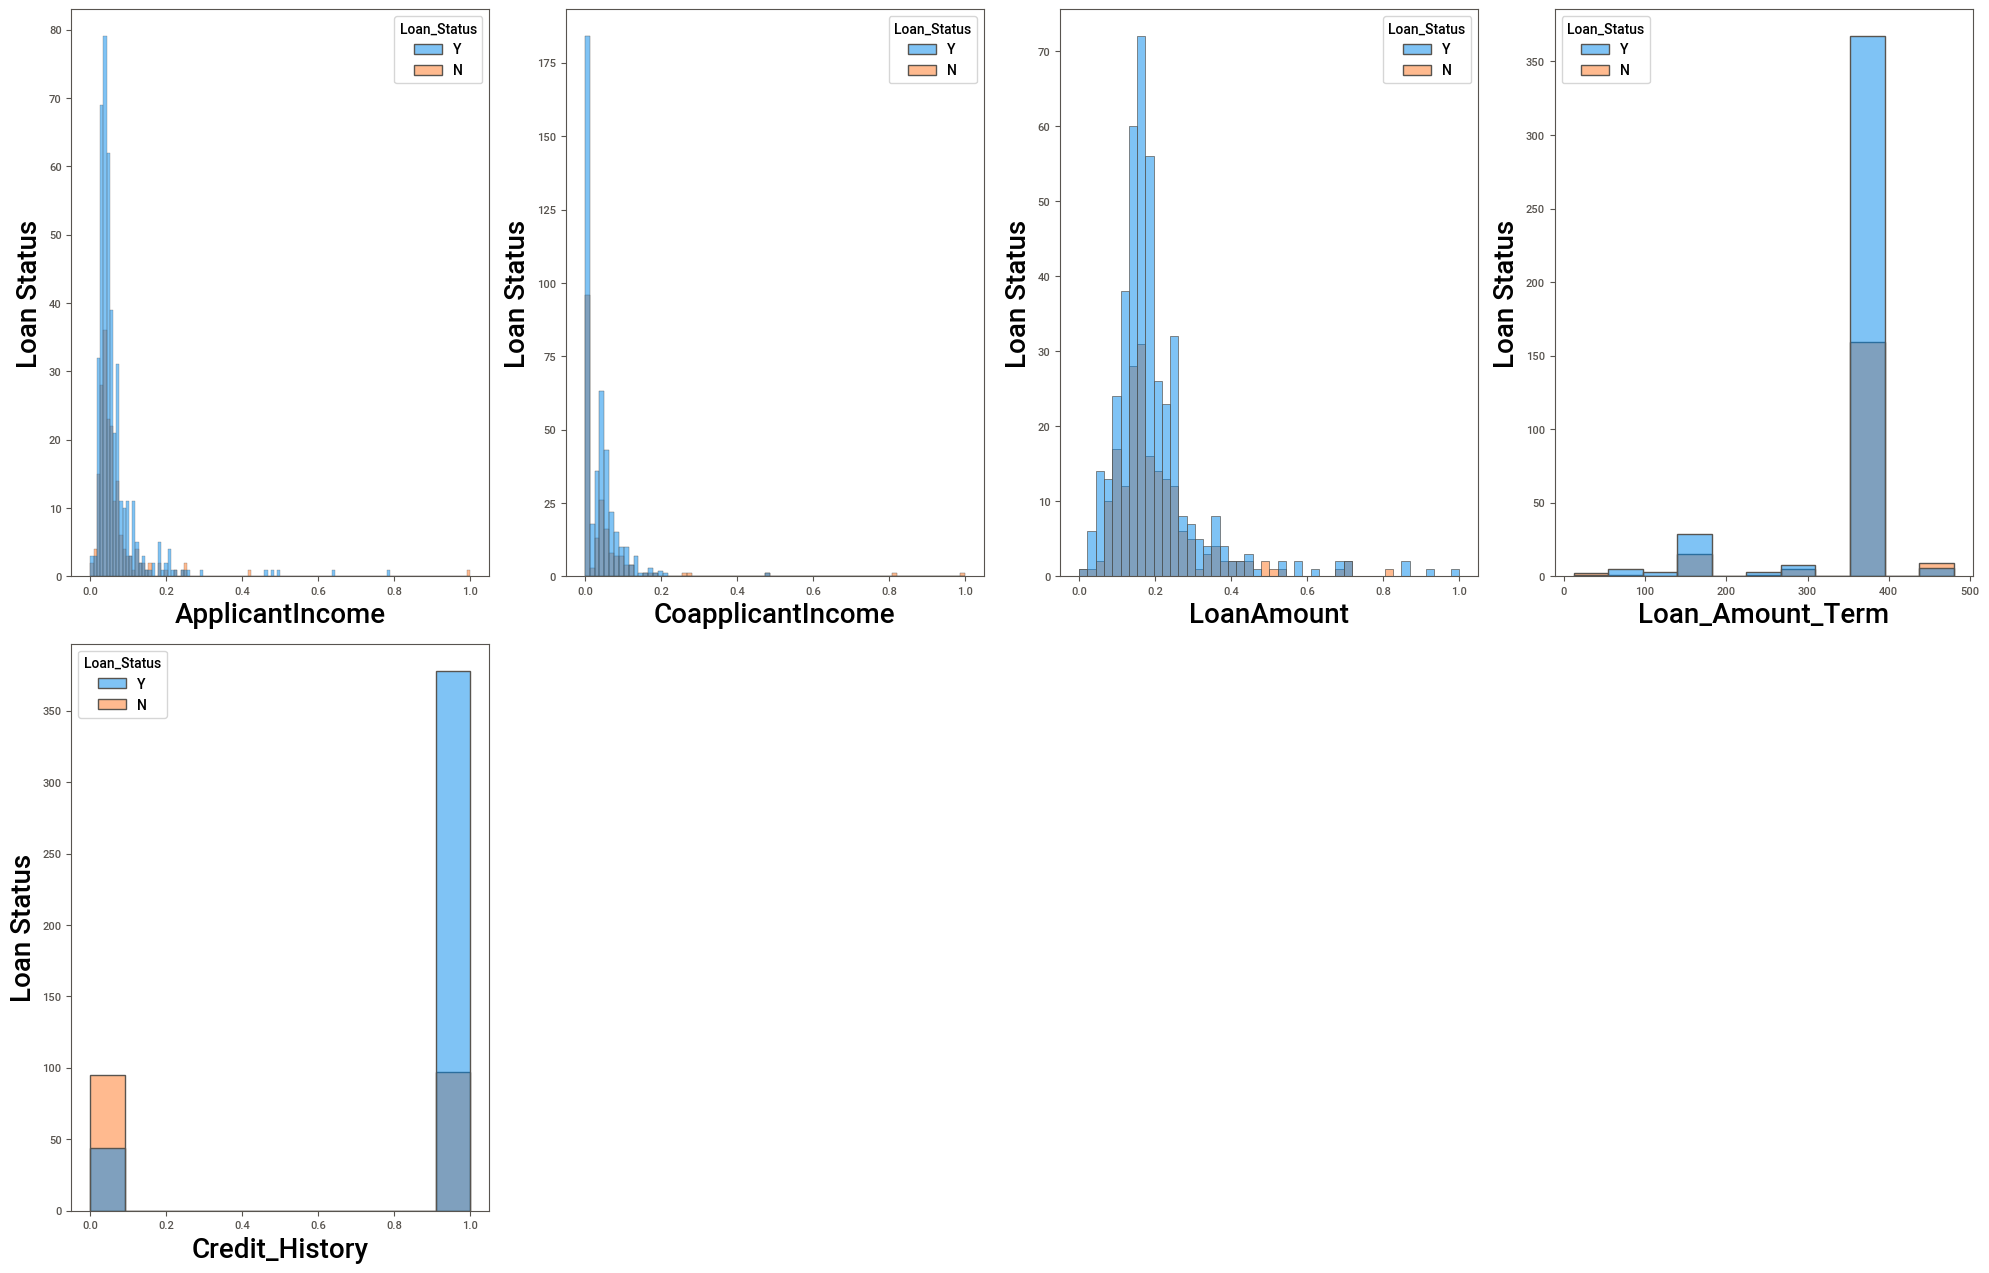

In [105]:
# histplot
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data2:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(x=data2[column],hue=data['Loan_Status'])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Loan Status',fontsize=20)
    plotnumber+=1
plt.tight_layout()

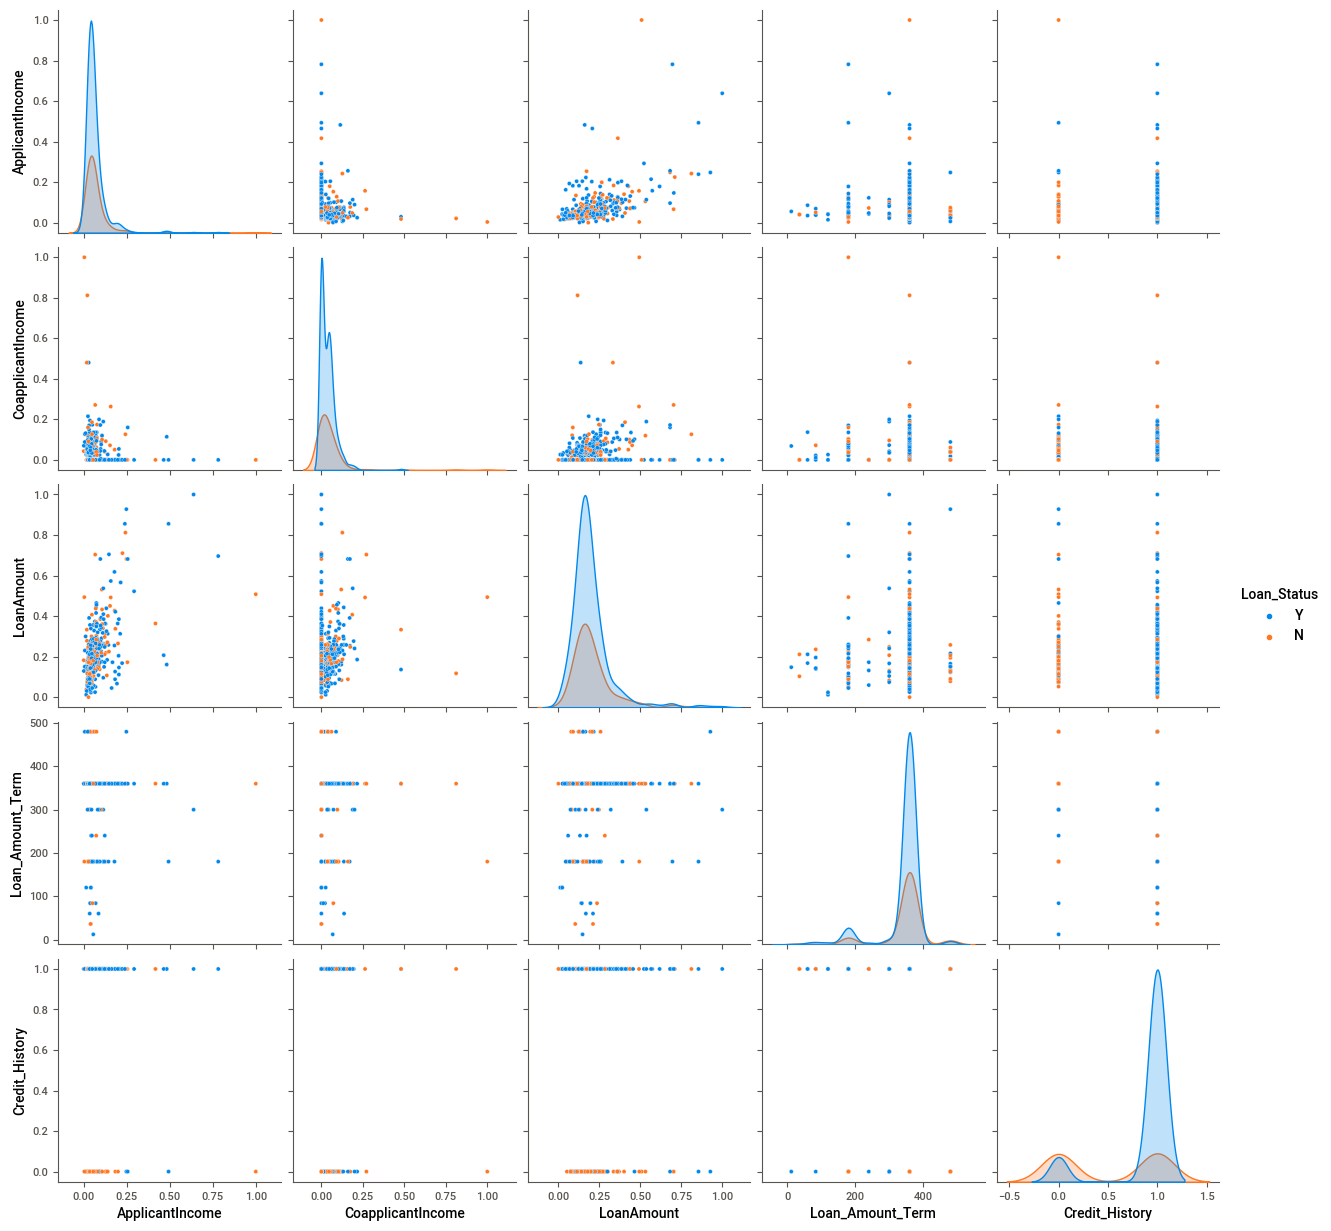

In [106]:
sns.pairplot(data,hue="Loan_Status")

## Data Preprocessing Pipeline

In [107]:
## Checking for missing values
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [108]:
# check percentage of missing values
data.isnull().sum()/len(data)*100

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [109]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Handle missing values in Gender

In [24]:
# Gender is categorical data hence replace with mode
data['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [110]:
## Imputing the missing values with mode
data.loc[data['Gender'].isnull()==True,'Gender']="Male"

### Handling missing values in Married

In [111]:
# Married is categorical data hence replace with mode
data['Married'].mode()

0    Yes
Name: Married, dtype: object

In [112]:
## Imputing the missing values with mode
data.loc[data['Married'].isnull()==True,'Married']='Yes'

### Handling missing values in Self employed


In [113]:
# Selfemployed is categorical data hence replace with mode
data['Self_Employed'].mode()

0    No
Name: Self_Employed, dtype: object

In [114]:
# Replace the nan values with mode
data.loc[data['Self_Employed'].isnull()==True,'Self_Employed']='No'

In [115]:
data.Dependents.dtypes

dtype('O')

### Handle missing values in Dependents

In [116]:
data.Dependents.dtypes

dtype('O')

In [117]:
data['Dependents'].mode()

0    0
Name: Dependents, dtype: object

In [118]:

data.loc[data['Dependents'].isnull()==True,'Dependents']='0'

In [119]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Handle missing values in Loan Amount


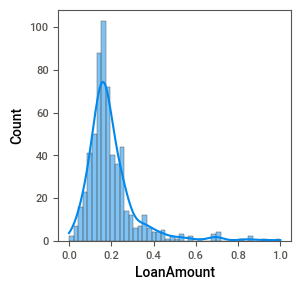

In [120]:
## check distribution of Loan amount
plt.figure(figsize=(3,3))
sns.histplot(data=data,x="LoanAmount",kde=True)
plt.show()

Since data is skewed, we can use median to replace the nan value. It is recommended to use mean only for symmetric data distribution.

In [121]:
# Check median for LoanAmount column
data['LoanAmount'].median()

0.17221418234442834

In [122]:
# Replace the nan values in LoanAmount column with median value
data.loc[data['LoanAmount'].isnull()==True,'LoanAmount']=data['LoanAmount'].median()

### Handle missing values in Loan amount term

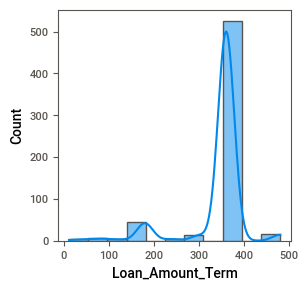

In [123]:
## check distribution of Loan amount term
plt.figure(figsize=(3,3))
sns.histplot(data=data,x="Loan_Amount_Term",kde=True)
plt.show()

In [124]:
data["Loan_Amount_Term"].median()

360.0

In [125]:
# replace the nan values in Loan_Amount_Term with the median value
data.loc[data['Loan_Amount_Term'].isnull()==True,'Loan_Amount_Term']=data["Loan_Amount_Term"].median()

### handle missing values in credit history

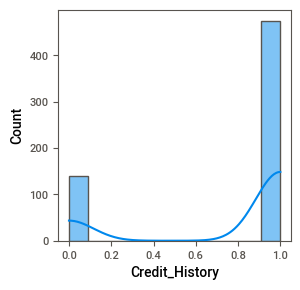

In [126]:
plt.figure(figsize=(3,3))
sns.histplot(data=data,x='Credit_History',kde=True)
plt.show()

In [127]:
# Credit_History
data.Credit_History.value_counts()

1.0    475
0.0    139
Name: Credit_History, dtype: int64

In [128]:
data.loc[data['Credit_History'].isnull()==True,'Credit_History']=0.0

In [129]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [130]:
# Check for duplicates
data.duplicated().sum()

0

## check for outliers

In [131]:
num_data=data.select_dtypes(include=["int64","float64"])

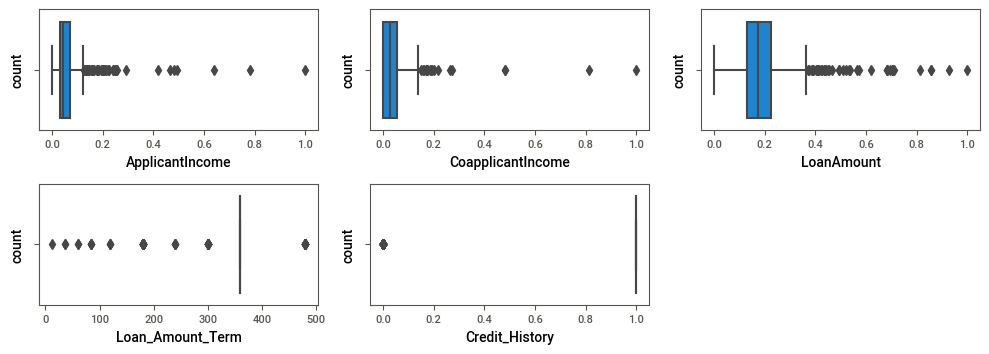

In [132]:
plt.figure(figsize=(10,5),facecolor='white')
plotnumber=1
for column in num_data:
    if plotnumber<9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(x=data[column])
        plt.xlabel(column,fontsize=10)
        plt.ylabel("count",fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [133]:
data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.070489,0.000000,0.172214,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,0.054830,0.036192,0.172214,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,0.035250,0.000000,0.082489,360.0,1.0,Urban,Y


## Scaling

In [134]:
## scaling data
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data[['ApplicantIncome','CoapplicantIncome','LoanAmount']]=scale.fit_transform(data[['ApplicantIncome','CoapplicantIncome',
                          'LoanAmount']])

In [135]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.070489,0.000000,0.172214,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,0.054830,0.036192,0.172214,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,0.035250,0.000000,0.082489,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,0.030093,0.056592,0.160637,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,0.072356,0.000000,0.191027,360.0,1.0,Urban,Y


## Converting categorical data into numerical data

# Label Encoder

In [136]:
data1=data.copy()

In [137]:
## Using label encoder to convert the categorical data to numerical data
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
data1.Gender=lc.fit_transform(data1.Gender)
data1.Married=lc.fit_transform(data1.Married)
data1.Education=lc.fit_transform(data1.Education)
data1.Property_Area=lc.fit_transform(data1.Property_Area)
data1.Loan_Status=lc.fit_transform(data1.Loan_Status)
data1.Dependents=lc.fit_transform(data1.Dependents)
data1.Self_Employed=lc.fit_transform(data1.Self_Employed)

In [138]:
data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.070489,0.000000,0.172214,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,0.054830,0.036192,0.172214,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,0.035250,0.000000,0.082489,360.0,1.0,Urban,Y


In [139]:
data1.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,0.070489,0.000000,0.172214,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,0.054830,0.036192,0.172214,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,0.035250,0.000000,0.082489,360.0,1.0,2,1


# Get dummies

In [140]:
data2=data.copy()

In [141]:
data2.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.070489,0.000000,0.172214,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,0.054830,0.036192,0.172214,360.0,1.0,Rural,N


In [142]:
df1=pd.get_dummies(data['Gender'],prefix="Gender",drop_first=True)
data2=pd.concat([data2,df1],axis=1).drop("Gender",axis=1)

In [143]:
data2.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male
0,LP001002,No,0,Graduate,No,0.070489,0.000000,0.172214,360.0,1.0,Urban,Y,1
1,LP001003,Yes,1,Graduate,No,0.054830,0.036192,0.172214,360.0,1.0,Rural,N,1
2,LP001005,Yes,0,Graduate,Yes,0.035250,0.000000,0.082489,360.0,1.0,Urban,Y,1
3,LP001006,Yes,0,Not Graduate,No,0.030093,0.056592,0.160637,360.0,1.0,Urban,Y,1
4,LP001008,No,0,Graduate,No,0.072356,0.000000,0.191027,360.0,1.0,Urban,Y,1


In [144]:
df1=pd.get_dummies(data2['Married'],prefix='Married',drop_first=True)
data2=pd.concat([data2,df1],axis=1).drop(['Married'],axis=1)


In [145]:
data2.head(3)

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male,Married_Yes
0,LP001002,0,Graduate,No,0.070489,0.000000,0.172214,360.0,1.0,Urban,Y,1,0
1,LP001003,1,Graduate,No,0.054830,0.036192,0.172214,360.0,1.0,Rural,N,1,1
2,LP001005,0,Graduate,Yes,0.035250,0.000000,0.082489,360.0,1.0,Urban,Y,1,1


In [146]:
df1=pd.get_dummies(data2['Education'],prefix='Education',drop_first=True)
data2=pd.concat([data2,df1],axis=1).drop(['Education'],axis=1)

In [147]:
df1=pd.get_dummies(data2['Property_Area'],prefix='Property_Area',drop_first=True)
data2=pd.concat([data2,df1],axis=1).drop(['Property_Area'],axis=1)

In [148]:
df1=pd.get_dummies(data2['Dependents'],prefix='Dependents',drop_first=True)
data2=pd.concat([data2,df1],axis=1).drop(['Dependents'],axis=1)

In [149]:
df1=pd.get_dummies(data2['Self_Employed'],prefix='Self_Employed',drop_first=True)
data2=pd.concat([data2,df1],axis=1).drop(['Self_Employed'],axis=1)

In [150]:
data2.shape

(614, 16)

In [151]:
data2.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes
0,LP001002,0.070489,0.000000,0.172214,360.0,1.0,Y,1,0,0,0,1,0,0,0,0
1,LP001003,0.054830,0.036192,0.172214,360.0,1.0,N,1,1,0,0,0,1,0,0,0
2,LP001005,0.035250,0.000000,0.082489,360.0,1.0,Y,1,1,0,0,1,0,0,0,1
3,LP001006,0.030093,0.056592,0.160637,360.0,1.0,Y,1,1,1,0,1,0,0,0,0
4,LP001008,0.072356,0.000000,0.191027,360.0,1.0,Y,1,0,0,0,1,0,0,0,0


In [152]:
## Saving the preprocessed data.
data2.to_csv('Preprocessed_data.csv')

In [153]:
## Loading the data
preprocessed_data=pd.read_csv('Preprocessed_data.csv')

In [154]:
preprocessed_data

,Unnamed: 0,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes
0,0,LP001002,0.070489,0.000000,0.172214,360.0,1.0,Y,1,0,0,0,1,0,0,0,0
1,1,LP001003,0.054830,0.036192,0.172214,360.0,1.0,N,1,1,0,0,0,1,0,0,0
2,2,LP001005,0.035250,0.000000,0.082489,360.0,1.0,Y,1,1,0,0,1,0,0,0,1
3,3,LP001006,0.030093,0.056592,0.160637,360.0,1.0,Y,1,1,1,0,1,0,0,0,0
4,4,LP001008,0.072356,0.000000,0.191027,360.0,1.0,Y,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,LP002978,0.034014,0.000000,0.089725,360.0,1.0,Y,0,0,0,0,0,0,0,0,0
610,610,LP002979,0.048930,0.000000,0.044863,180.0,1.0,Y,1,1,0,0,0,0,0,1,0
611,611,LP002983,0.097984,0.005760,0.353111,360.0,1.0,Y,1,1,0,0,1,1,0,0,0
612,612,LP002984,0.091936,0.000000,0.257598,360.0,1.0,Y,1,1,0,0,1,0,1,0,0


## Feature Selection

In [155]:
# Removing redundant columns
#We can drop loan id.  

preprocessed_data.drop(['Unnamed: 0','Loan_ID'],axis=1,inplace=True)

In [156]:
preprocessed_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes
0,0.070489,0.000000,0.172214,360.0,1.0,Y,1,0,0,0,1,0,0,0,0
1,0.054830,0.036192,0.172214,360.0,1.0,N,1,1,0,0,0,1,0,0,0
2,0.035250,0.000000,0.082489,360.0,1.0,Y,1,1,0,0,1,0,0,0,1
3,0.030093,0.056592,0.160637,360.0,1.0,Y,1,1,1,0,1,0,0,0,0
4,0.072356,0.000000,0.191027,360.0,1.0,Y,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.034014,0.000000,0.089725,360.0,1.0,Y,0,0,0,0,0,0,0,0,0
610,0.048930,0.000000,0.044863,180.0,1.0,Y,1,1,0,0,0,0,0,1,0
611,0.097984,0.005760,0.353111,360.0,1.0,Y,1,1,0,0,1,1,0,0,0
612,0.091936,0.000000,0.257598,360.0,1.0,Y,1,1,0,0,1,0,1,0,0


In [157]:
## checking correlation
corr_data=preprocessed_data[['ApplicantIncome','CoapplicantIncome','LoanAmount']]

<Axes: >

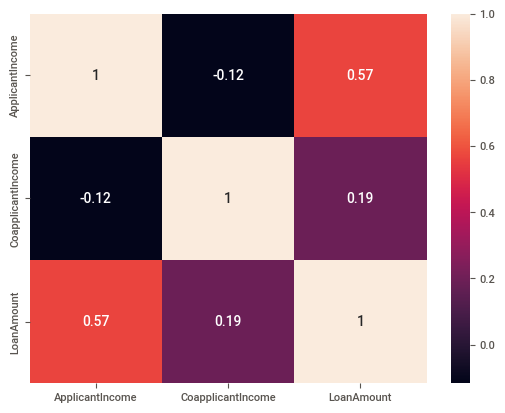

In [158]:
sns.heatmap(corr_data.corr(),annot=True)

In [159]:
## There is no relationship among the numerical data 

In [160]:
# Replace Y--1 and N--0
preprocessed_data['Loan_Status']=preprocessed_data.Loan_Status.map({'Y':1,'N':0})

In [161]:
preprocessed_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes
0,0.070489,0.000000,0.172214,360.0,1.0,1,1,0,0,0,1,0,0,0,0
1,0.054830,0.036192,0.172214,360.0,1.0,0,1,1,0,0,0,1,0,0,0
2,0.035250,0.000000,0.082489,360.0,1.0,1,1,1,0,0,1,0,0,0,1
3,0.030093,0.056592,0.160637,360.0,1.0,1,1,1,1,0,1,0,0,0,0
4,0.072356,0.000000,0.191027,360.0,1.0,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.034014,0.000000,0.089725,360.0,1.0,1,0,0,0,0,0,0,0,0,0
610,0.048930,0.000000,0.044863,180.0,1.0,1,1,1,0,0,0,0,0,1,0
611,0.097984,0.005760,0.353111,360.0,1.0,1,1,1,0,0,1,1,0,0,0
612,0.091936,0.000000,0.257598,360.0,1.0,1,1,1,0,0,1,0,1,0,0


## Model Creation

In [162]:
x=preprocessed_data.drop("Loan_Status",axis=1)
y=preprocessed_data["Loan_Status"]

In [163]:
## creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.25,random_state=3)

### Balancing data

In [164]:
## balancing the data
data.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

## Smote

In [165]:
!pip install imblearn

In [166]:
# Install imblearn package - pip install imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [167]:
# Smote is always applied on train data(x_train and y_train)
x_smote, y_smote = smote.fit_resample(x_train,y_train)

**Counter** is a container which keeps track to how many times equivalent values are added. Python counter class is a part of collections module and is a subclass of dictionary.

In [168]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({1: 301, 0: 159})
SMOTE Classes Counter({1: 301, 0: 301})


In [169]:
# Support Vector Classifier Model
from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(x_smote, y_smote)

SVC()

In [170]:
# Predict output for X_test
y_pred=svclassifier.predict(x_test)

In [171]:
## evaluating the model created
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
acc=accuracy_score(y_test,y_pred)
acc

0.7857142857142857

In [172]:
f1_score(y_test,y_pred)

0.8782287822878228

In [173]:
# Calssification report measures the quality of predictions. True Positives, False Positives, True negatives and False Negatives 
# are used to predict the metrics of a classification report 

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.06      0.11        33
           1       0.79      0.98      0.88       121

    accuracy                           0.79       154
   macro avg       0.65      0.52      0.49       154
weighted avg       0.73      0.79      0.71       154



In [174]:
## checking cross validation score
from sklearn.model_selection import cross_val_score
scores=cross_val_score(svclassifier,x,y,cv=3,scoring='f1')
print(scores)
print("cross validation score",scores.mean())
print("standard deviation",scores.std())
# std <0.05 , then model is good otherwise bad model.

[0.8150289  0.8150289  0.81395349]
cross validation score 0.8146704306134337
standard deviation 0.0005069547205710685


# Hyperparameter tuning

In [175]:
# gridsearch cv
from sklearn.model_selection import GridSearchCV
# define hyperparameter range
param_grid={'C':[0.1,5,10,50,60,70],'gamma':[1,0.1,0.01,0.001,0.001],
            'random_state':list(range(1,20))}
model=SVC()
grid=GridSearchCV(model,param_grid,verbose=2,scoring="f1",cv=5)
grid.fit(x,y)

Fitting 5 folds for each of 570 candidates, totalling 2850 fits
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=3; total time=   0.0s
[CV] END .....................C=0.1, gamma=1,

[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................

[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ..................C

[CV] END .................C=0.1, gamma=0.001, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=

[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=11; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=11; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=11; total time=   0.0s
[CV] END ................C=0

[CV] END ......................C=5, gamma=1, random_state=11; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=11; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=11; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=11; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=12; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=12; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=12; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=12; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=12; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=13; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=13; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=13; total time=   0.0s
[CV] END ...................

[CV] END ....................C=5, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................

[CV] END ...................C=5, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ...................

[CV] END ..................C=5, gamma=0.001, random_state=16; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=16; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=16; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=16; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=18; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=18; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=18; total time=   0.0s
[CV] END ..................C

[CV] END ..................C=5, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=18; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=18; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=18; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=18; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=18; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=19; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=19; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=19; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=19; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=19; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=1; total time=   0.0s
[CV] END ...................

[CV] END .....................C=10, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=19; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................

[CV] END ...................C=10, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................

[CV] END ..................C=10, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C

[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=

[CV] END .....................C=50, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=12; total time=   0.0s
[CV] END ...................

[CV] END ...................C=50, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................

[CV] END ..................C=50, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C

[CV] END .................C=50, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=

[CV] END .................C=50, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=19; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=1; total time=   0.0s
[CV] END ...................

[CV] END ....................C=60, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................

[CV] END ...................C=60, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................

[CV] END ..................C=60, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C

[CV] END ..................C=60, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=

[CV] END .....................C=70, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=12; total time=   0.0s
[CV] END ...................

[CV] END ...................C=70, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................

[CV] END ..................C=70, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C

[CV] END .................C=70, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=

[CV] END .................C=70, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=19; total time=   0.0s


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 5, 10, 50, 60, 70],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='f1', verbose=2)

In [186]:
print(grid.best_params_)

{'C': 70, 'gamma': 0.01, 'random_state': 1}


In [187]:
model=SVC(C=70,gamma=0.01,random_state=1)
model.fit(x_smote,y_smote)

SVC(C=70, gamma=0.01, random_state=1)

In [188]:
y_pred=model.predict(x_test)

In [189]:
accuracy_score(y_test,y_pred)

0.7857142857142857

In [190]:
f1_score(y_test,y_pred)

0.8653061224489798

# KNN Model


In [181]:
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier(n_neighbors=11)
model.fit(x_smote,y_smote)


KNeighborsClassifier(n_neighbors=11)

In [182]:
y_pred=model.predict(x_test)

In [183]:
accuracy_score(y_test,y_pred)

0.7142857142857143

# Logistic Regression


In [184]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_smote,y_smote)
y_pred=model.predict(x_test)

In [185]:
accuracy_score(y_test,y_pred)

0.7077922077922078